### Import modules

In [1]:
# Python Version 3.9.13, conda version 23.3.1

#### To see the version of module you are using, open terminal and type "pip list" or print(module.__version__)

In [2]:
import numpy as np # v 1.21.5
import sklearn # v 1.02.
import pandas as pd # v 1.5.3
import pandas_profiling as pp # v 3.6.3
import matplotlib.pyplot as plt # v 3.7.1
import statsmodels.api as sm # v.0.13.2

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error


%matplotlib inline

- Train, test, split function : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
- Metrics: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics      

### Import Data

#### Data can be accesed from here : https://www.kaggle.com/datasets/kanths028/usa-housing

In [3]:
hse = pd.read_csv(r"C:\Users\rodge\OneDrive\Desktop\Data 300 GitHub\DATA-300-Statistical-Machine-Learning-Fall-2023-\Data\USA_Housing.csv")

### Exploratory data analysis

In [4]:
hse.shape, hse.columns, hse.dtypes

((5000, 7),
 Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
        'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
       dtype='object'),
 Avg. Area Income                float64
 Avg. Area House Age             float64
 Avg. Area Number of Rooms       float64
 Avg. Area Number of Bedrooms    float64
 Area Population                 float64
 Price                           float64
 Address                          object
 dtype: object)

#### How much of my data is missing? 

In [5]:
hse.isna().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

### Show the first 5 or last 5 rows of the data set

In [6]:
hse.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [7]:
hse.tail()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316
4999,65510.581804,5.992305,6.792336,4.07,46501.283803,1.298950e+06,"37778 George Ridges Apt. 509\nEast Holly, NV 2..."


### Summary Statistics

In [8]:
hse.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


#### Visualize the data set

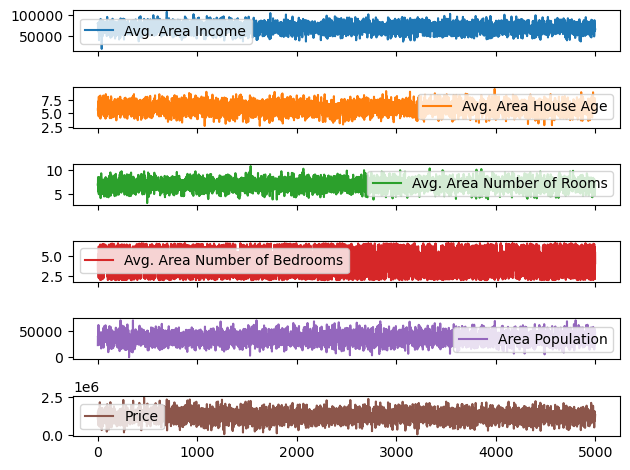

In [9]:
hse.plot(subplots=True)
plt.tight_layout()
plt.show()

#### Using Pandas Profiling

In [10]:
pp.ProfileReport(hse)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### Machine Learning part : We need to separate our data in two main ways:
-  Seprate the dependent variable and the independent variable
- Split the data for the training (the portion of the data that fits the model a.k.a your machine learns from) and the testing set. We do that below

### First drop the address column because it is a text field.

In [11]:
hse.Address.nunique() # There is 5000 unique addresses in the data

5000

#### Drop the columns that you do not need

In [12]:
# del df['column_name']
#df = df.drop('column_name', axis=1)

In [13]:
hse.drop(columns = "Address", inplace =  True)

#### Separate data set in Y(independent) and X (dependent) variable

In [14]:
y = hse["Price"] # Y = hse.Price

In [15]:
X = hse.loc[:, hse.columns != "Price"] # I want all columns except the Price column which is the dependent variable

#### Use the train_test_split function to split your data into training and testing set

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

#### Fit, run or estimate the regression model

In [17]:
model = LinearRegression() ### Create an instance of the linear regression class

In [18]:
model.fit(X_train, y_train)

LinearRegression()

In [19]:
model.coef_

array([2.17817427e+01, 1.65956596e+05, 1.23154467e+05, 6.04149767e+02,
       1.52596480e+01])

In [20]:
print(model.intercept_, model.coef_,model.score(X_test, y_test)) # model score gives you the R- squared

-2668175.5573938973 [2.17817427e+01 1.65956596e+05 1.23154467e+05 6.04149767e+02
 1.52596480e+01] 0.9074885300924723


#### Using the independent variables in the testing set, to predict the dependent variables

In [21]:
y_pred = model.predict(X_test)

#### Using the test set, check how well your model does in terms of error metrics

In [22]:
MAE = mean_absolute_error(y_test,y_pred)

In [23]:
MSE = mean_squared_error(y_test,y_pred)

In [24]:
MAPE =  mean_absolute_percentage_error(y_test,y_pred)

#### These are the error metrics

In [25]:
MSE, MAE,MAPE

(10687716300.595863, 83461.11744244256, 0.07442419432491626)

## Using Statsmodels

In [26]:
X_train = sm.add_constant(X_train)

In [27]:
model2 = sm.OLS(y_train, X_train).fit()

In [28]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     8251.
Date:                Wed, 30 Aug 2023   Prob (F-statistic):               0.00
Time:                        17:16:28   Log-Likelihood:                -45267.
No. Observations:                3500   AIC:                         9.055e+04
Df Residuals:                    3494   BIC:                         9.058e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

#### In- sample prediction

In [29]:
ypred2 = model2.predict(X_train)

In [30]:
model2.params

const                          -2.668176e+06
Avg. Area Income                2.178174e+01
Avg. Area House Age             1.659566e+05
Avg. Area Number of Rooms       1.231545e+05
Avg. Area Number of Bedrooms    6.041498e+02
Area Population                 1.525965e+01
dtype: float64